In [2]:
# Importing the required packages here
import numpy as np
from numpy import array
import pandas as pd
import seaborn as sns
import ast, json
from wordcloud import WordCloud
from PIL import Image
from datetime import datetime
import matplotlib.pyplot as plt

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import missingno
# https://pypi.org/project/wbgapi/
# import wbgapi as wb ##<== for World Bank API dataset reading, not used here

## READ IN csv FILE, REPLACE EMPTY VALUES WITH NaN AND SAVE DATAFRAME TO A VARIABLE CALLED 'df'
## VIEW THE TOP 5-ROWS IN THE DATAFRAME --> df.head()

In [3]:
df = pd.read_csv('Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv', delimiter=',', na_values='')
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


## VIEW DATATYPES, COLUMN-HEADINGS & INDICATION OF WHERE MISSING VALUES ARE --> df.info()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


## VIEW WHERE MISSING VALUES ARE BY COLUMN-HEADING WITH A PRECISE COUNT --> df.isnull.sum()

In [5]:
df.isnull().sum()

S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      24
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

## VIEW A PRECISE LIST OF COLUMN HEADINGS --> list(df)

In [6]:
# FIND A LIST OF COLUMN HEADINGS FOR df
list(df)

['S.NO',
 'Name',
 'Nationality',
 'Current Rank',
 'Previous Year Rank',
 'Sport',
 'Year',
 'earnings ($ million)']

## IDENTIFY THE INDIVIDUAL UNIQUE ELEMENTS IN THE 'Nationality' COLUMN TO IDENTIFY IF ANY VALUES ARE DUPLICATED OR SIMILAR

In [7]:
df.Nationality.unique()

array(['USA', 'Brazil', 'France', 'Australia', 'Canada', 'UK', 'Austria',
       'Germany', 'Russia', 'Italy', 'Finland', 'Switzerland',
       'Philippines', 'Portugal', 'Dominican', 'Argentina', 'Filipino',
       'Spain', 'Serbia', 'Northern Ireland', 'Ireland', 'Mexico'],
      dtype=object)

    all values in the Nationality column appear to be unique

## IDENTIFY THE INDIVIDUAL UNIQUE ELEMENTS IN THE 'Sport' COLUMN TO IDENTIFY IF ANY VALUES ARE DUPLICATED OR SIMILAR

In [8]:
df.Sport.unique()

array(['boxing', 'auto racing', 'golf', 'basketball', 'Basketball',
       'Boxing', 'Auto Racing', 'Golf', 'Tennis', 'NFL', 'Auto racing',
       'NBA', 'Baseball', 'Ice Hockey', 'American Football / Baseball',
       'tennis', 'ice hockey', 'F1 Motorsports', 'NASCAR', 'Hockey',
       'Auto Racing (Nascar)', 'F1 racing', 'American Football', 'soccer',
       'baseball', 'cycling', 'motorcycle gp', 'Soccer', 'MMA'],
      dtype=object)

    BELOW IS A LIST OF CONFUSING/SIMILAR/QUESTIONABLE NON-UNIQUE VALUES FOUND IN THE 'Sport' COLUMN

- 'Soccer' = 'soccer'
- 'Basketball' = 'basketball'
- 'American Football' = 'NFL'
- 'Baseball' = 'baseball'
- 'Hockey' = 'hockey'
- 'Auto Racing' = 'auto racing' = 'Auto racing'
- 'Tennis' = 'tennis'
- 'Basketball' = 'basketball' = NBA
- 'Golf' = 'golf'
- 'American Football / Baseball'??? --> find the element to investigate, is this a person who is both professional American Football and Baseball player? Unlikely.
- 'F1 racing' = 'F1 Motorsports'
- 'NASCAR' = 'Auto Racing (Nascar)'
- 'Ice Hockey' = 'ice hockey' = 'hockey'--> are 'hockey' players ice-hockey players? Do google search for the identified individual's name.
- 'Boxing' = 'boxing'
- 'cycling', who is listed in this column...do google search to find out if it is bike cycling or motorcycling?
- 'MMA', what is MMA, do google search to find out?


## IDENTIFY WHAT THE 'Hockey' VALUE IN THE 'Sport' COLUMN REFERS FOR FURTHER INVESTIGATION AS TO THE CONTEXT MEANING OF 'Hockey' ONCE I HAVE THE PERSON'S NAME

In [9]:
rslt_hockey = df.loc[(df.Sport == 'Hockey')]
print(rslt_hockey)

    S.NO       Name Nationality  Current Rank Previous Year Rank   Sport  \
78    79  Joe Sakic      Canada             9               none  Hockey   

    Year  earnings ($ million)  
78  1997                  17.9  


    https://en.wikipedia.org/wiki/Joe_Sakic

    A key passage from the Joe Sakic wikipedia article states that he is an 'Ice Hockey' player, not a 'Hockey' player.

    "Joseph Steven Sakic (/ˈsækɪk/;[1] born July 7, 1969) is a Canadian professional ice hockey executive and former player. He played his entire 21-year National Hockey League (NHL) career with the Quebec Nordiques/Colorado Avalanche franchise."

## IDENTIFY WHAT THE 'American Football / Baseball' VALUE IN THE 'Sport' COLUMN REFERS FOR FURTHER INVESTIGATION AS TO THE CONTEXT MEANING OF 'American Football / Baseball' ONCE I HAVE THE PERSON'S NAME

In [10]:
rslt_amfootball_baseball = df.loc[(df.Sport == 'American Football / Baseball')]
print(rslt_amfootball_baseball)

    S.NO           Name Nationality  Current Rank Previous Year Rank  \
52    53  Deion Sanders         USA             3                 38   

                           Sport  Year  earnings ($ million)  
52  American Football / Baseball  1995                  22.5  


    https://en.wikipedia.org/wiki/Deion_Sanders

    A key part of the Deion Sanders wikipedia page indicates that he was a unique individual who simultaneously played both American Football and Baseball at a top level.

    "During the 1989 season, he hit a major league home run and scored a touchdown in the NFL in the same week, becoming the only player ever to do so. Sanders is also the only man to play in both a Super Bowl and a World Series."

    I will retain a unique designation of 'American Football / Baseball' under the 'Sport' column because he is an unique person.

## IDENTIFY WHAT THE 'cycling' VALUE IN THE 'Sport' COLUMN REFERS FOR FURTHER INVESTIGATION AS TO THE CONTEXT MEANING OF 'cycling' ONCE I HAVE THE PERSON'S NAME

In [11]:

rslt_cycling = df.loc[(df.Sport == 'cycling')]
print(rslt_cycling)

     S.NO             Name Nationality  Current Rank Previous Year Rank  \
149   150  Lance Armstrong         USA             9                >10   

       Sport  Year  earnings ($ million)  
149  cycling  2005                  28.0  


    https://en.wikipedia.org/wiki/Lance_Armstrong

    A key sentence in the wikipedia article for Lance Armstrong makes it clear that he was a professional 'pedal cyclist' and not a 'motorcyclist'.

    "Lance Edward Armstrong (né Gunderson; born September 18, 1971)[4] is an American former professional road racing cyclist."

    It would be helpful to modify the 'cycling' value to make it more clear that this refers to pedal cycling.

In [12]:
rslt_mma = df.loc[(df.Sport == 'MMA')]
print(rslt_mma)

     S.NO            Name Nationality  Current Rank Previous Year Rank Sport  \
274   275  Conor McGregor     Ireland             4                 24   MMA   

     Year  earnings ($ million)  
274  2018                  99.0  


    https://en.wikipedia.org/wiki/Mixed_martial_arts

    The key sentence from the wikipedia page about 'MMA' indicates that this is a mixed martial art sport.

    "Mixed martial arts (MMA) is a full-contact combat sport based on striking, grappling and ground fighting, incorporating techniques from various combat sports from around the world."

    It would be clearer to modify the MMA value to make its meaning more clear.

- 'Soccer' = 'soccer'
- 'Basketball' = 'basketball'
- 'American Football' = 'NFL'
- 'Baseball' = 'baseball'
- 'Hockey' = 'hockey'
- 'Auto Racing' = 'auto racing'
- 'Tennis' = 'tennis'
- 'Basketball' = 'basketball' = NBA
- 'Golf' = 'golf'
- 'American Football / Baseball'??? --> find the element to investigate, is this a person who is both professional American Football and Baseball player? Unlikely.
- 'F1 racing' = 'F1 Motorsports'
- 'NASCAR' = 'Auto Racing (Nascar)'
- 'Ice Hockey' = 'ice hockey' = 'hockey'--> are 'hockey' players ice-hockey players? Do google search for the identified individual's name.
- 'Boxing' = 'boxing'
- 'cycling', who is listed in this column...do google search to find out if it is bike cycling or motorcycling?
- 'MMA', what is MMA, do google search to find out?

In [13]:
df.Sport.replace('soccer','Soccer', inplace=True)
df.Sport.replace('basketball','Basketball', inplace=True)
df.Sport.replace('NFL','American Football', inplace=True)
df.Sport.replace('baseball','Baseball', inplace=True)
df.Sport.replace('hockey','Hockey', inplace=True)
df.Sport.replace('auto racing','Auto Racing', inplace=True)
df.Sport.replace('Auto Racing (Nascar)','Auto Racing', inplace=True)
df.Sport.replace('tennis','Tennis', inplace=True)
df.Sport.replace('basketball','Basketball', inplace=True)
df.Sport.replace('golf','Golf', inplace=True)
df.Sport.replace('F1 racing','F1 Motorsports', inplace=True)
df.Sport.replace('ice hockey','Ice Hockey', inplace=True)
df.Sport.replace('hockey','Ice Hockey', inplace=True)
df.Sport.replace('boxing','Boxing', inplace=True)
df.Sport.replace('MMA','Mixed Martial Arts', inplace=True)
df.Sport.replace('Auto racing', 'Auto Racing', inplace=True)
df.Sport.replace('cycling','Pedal Cycling', inplace=True)
df.Sport.replace('motorcycle gp','Motorcycle GP', inplace=True)
df.Sport.replace('NBA','Basketball', inplace=True)
df.Sport.replace('NASCAR','Auto Racing', inplace=True)

In [56]:
df.Sport.unique()

array(['Boxing', 'Auto Racing', 'Golf', 'Basketball', 'Tennis',
       'American Football', 'Baseball', 'Ice Hockey',
       'American Football / Baseball', 'F1 Motorsports', 'Hockey',
       'Soccer', 'Pedal Cycling', 'Motorcycle GP', 'Mixed Martial Arts'],
      dtype=object)

    CONFIRMING THAT THE ABOVE CHANGES HAVE TAKEN PLACE IN THE df.Sport COLUMN

    The required changes to clean the df.Sport column has taken place above.

## CHECKING IF THERE SIMILAR/CONFUSING ENTRIES IN THE 'Name' COLUMN

In [55]:
df.Name.unique()

array(['Mike Tyson', 'Buster Douglas', 'Sugar Ray Leonard',
       'Ayrton Senna', 'Alain Prost', 'Jack Nicklaus', 'Greg Norman',
       'Michael Jordan', 'Arnold Palmer', 'Evander Holyfield',
       'George Foreman', 'Donovan "Razor" Ruddock', 'Nigel Mansell',
       'Andre Agassi', 'Joe Montana', 'Jim Courier', 'Monica Seles',
       'Riddick Bowe', "Shaquille O'Neal", 'Lennox Lewis',
       'Cecil Fielder', "Shaq O'Neal", 'Gerhard Berger', 'Wayne Gretzky',
       'Michael Moorer', 'Deion Sanders', 'Michael Schumacher',
       'Emmit Smith', 'Dennis Rodman', 'Patrick Ewing',
       'Oscar De La Hoya', 'Tiger Woods', 'Dale Earnhardt', 'Joe Sakic',
       'Grant Hill', 'Sergei Federov', 'Gary Sheffield', 'Kevin Garnett',
       'Kobe Bryant', 'Jacques Villeneuve', 'Jeff Gordon',
       'Alex Rodriguez', 'Peyton Manning', 'David Beckham',
       'Michael Vick', 'Lance Armstrong', 'Valentino Rossi',
       'Muhammad Ali', 'Phil Mickelson', 'Tom Brady', 'Kimi Raikkonen',
       'Ronaldinh

    DO NOT SEE ANY CONFUSING ENTRIES IN THE 'Name' COLUMN

## DO NOT PLAN TO USE THE 'Previous Year Rank' & 'Current Rank' COLUMN, SO THIS CAN BE DROPPED.

In [15]:
df.drop(['Previous Year Rank', 'Current Rank'], axis=1, inplace=True)

## CONFIRMING THE 'Previous Year Rank' & 'Current Rank' COLUMN IS DROPPED

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Sport                 301 non-null    object 
 4   Year                  301 non-null    int64  
 5   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 14.2+ KB


    'Previous Year Rank' COLUMN HAS BEEN DROPPED, CAN BE SEEN FROM df.info() OUTPUT

## USE drop_duplicates() FUNCTION TO DROP DUPLICATES, IF ANY

In [17]:
dfv2 = df.drop_duplicates()
dfv2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 300
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Sport                 301 non-null    object 
 4   Year                  301 non-null    int64  
 5   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 16.5+ KB


    BY CHECKING THE dfv2.info() WITH THE df.info() AT APPROX. LINE [128] ABOVE, IT CAN BE IDENTIFIED THAT THERE WERE NO DUPLICATED ROWS.

## I WILL FOCUS ON GRAPHS TO VISUALISE THE DATAFRAME AROUND THE NATIONALITY, NAME, SPORT AND EARNINGS VALUES.

In [18]:
# country_earning = dfv2.groupby(by = 'Nationality').sum().sort_values('earnings ($ million)',ascending=False)

## A GRAPH OF EARNINGS BY COUNTRY - histplot()

Text(0.5, 1.0, 'Forbes Richest Athletes 1990-2020, Earnings by Country')

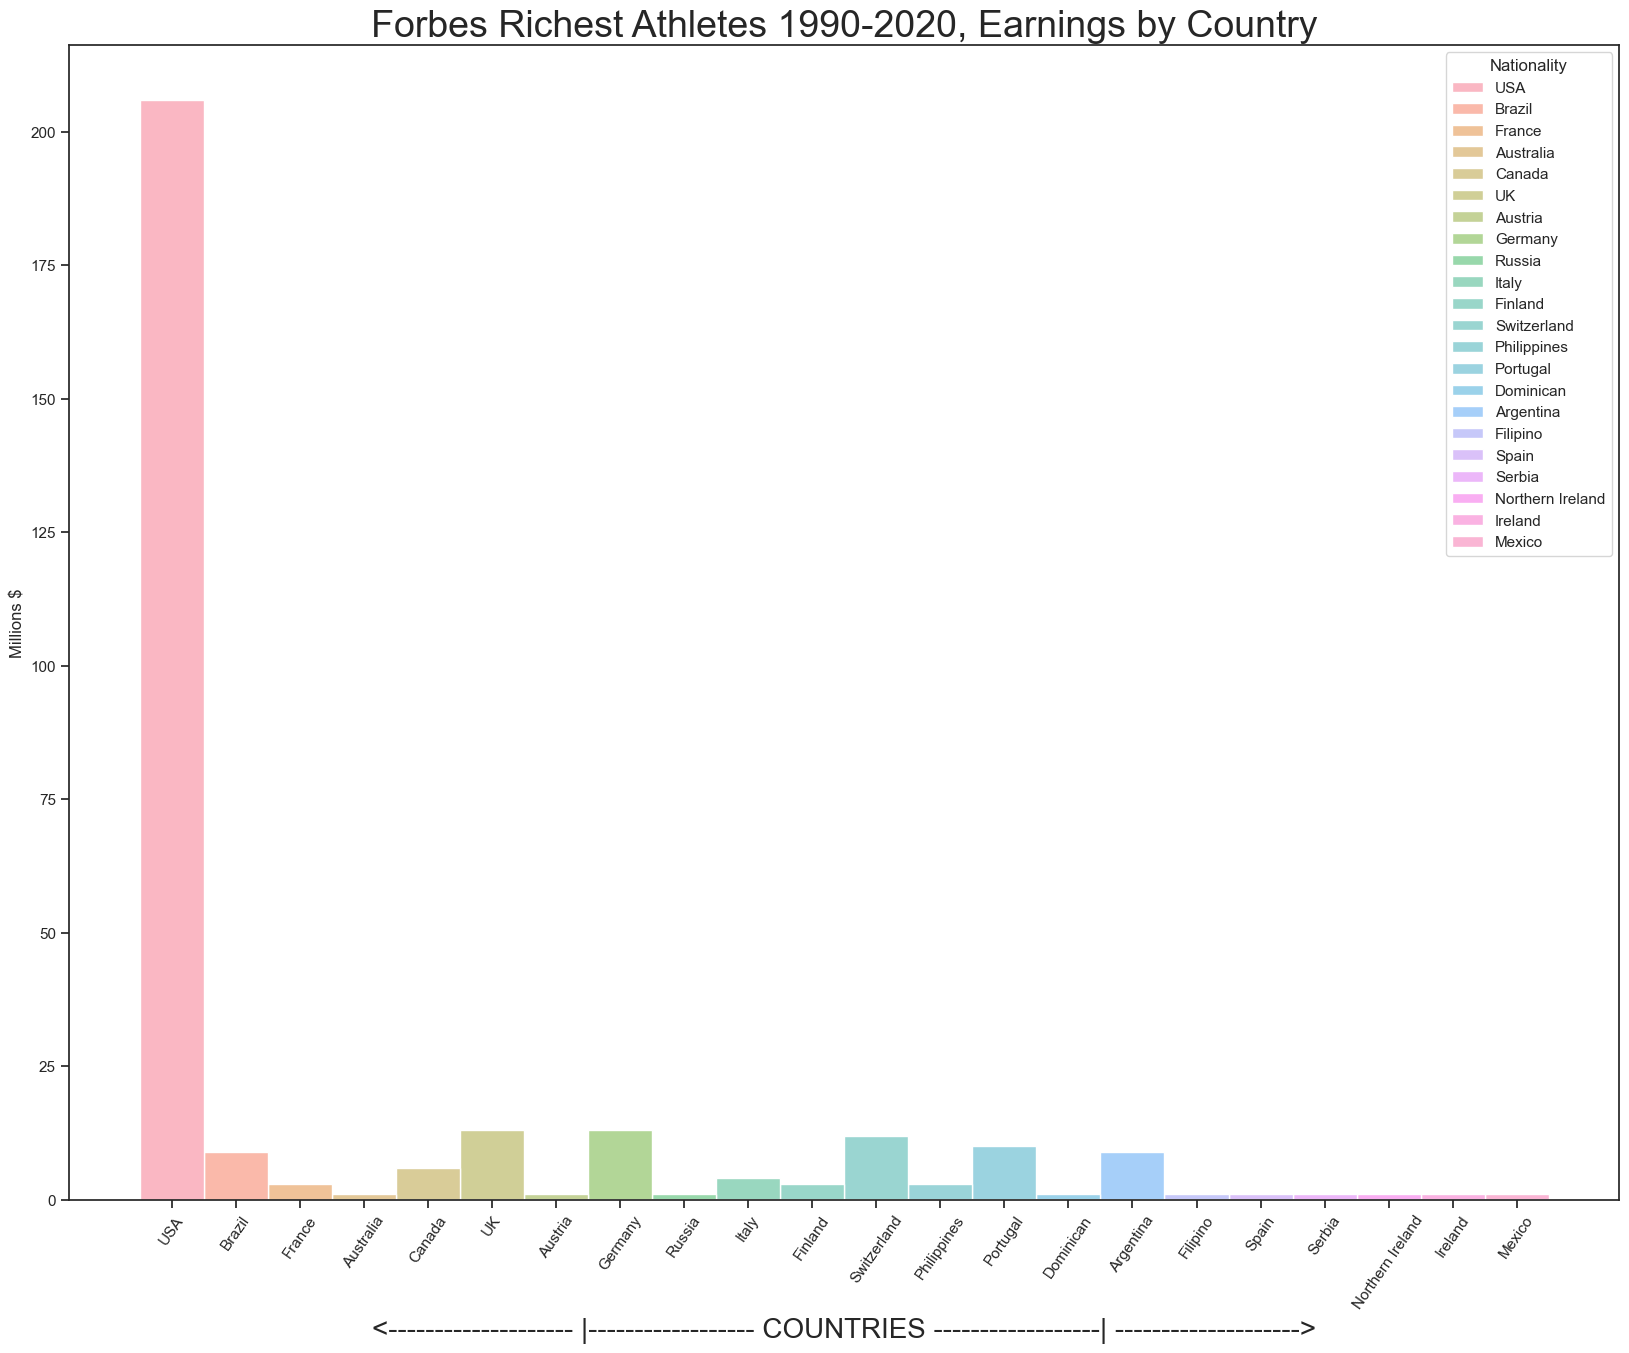

In [47]:
# CLEAR EXPLAINATION OF HOW TO FORMULATE A SEABORN histplot()
#https://machinelearningknowledge.ai/seaborn-histogram-plot-using-histplot-tutorial-for-beginners/
sns.histplot(data=dfv2, x='Nationality', hue='Nationality') #hue='earnings ($ million)'
sns.set(rc={"figure.figsize":(20, 10)}) #width=20, height=10
plt.ylabel('Millions $')
plt.xlabel('<-------------------- |------------------ COUNTRIES ------------------| -------------------->', fontsize=20)
plt.xticks(rotation=55) 
plt.title('Forbes Richest Athletes 1990-2020, Earnings by Country', fontsize=27)

## GRAPH OF EARNINGS BY INDIVIDUAL - barplot()

Text(0.5, 1.0, 'Forbes Richest Athletes 1990-2020, Earnings by Individuals')

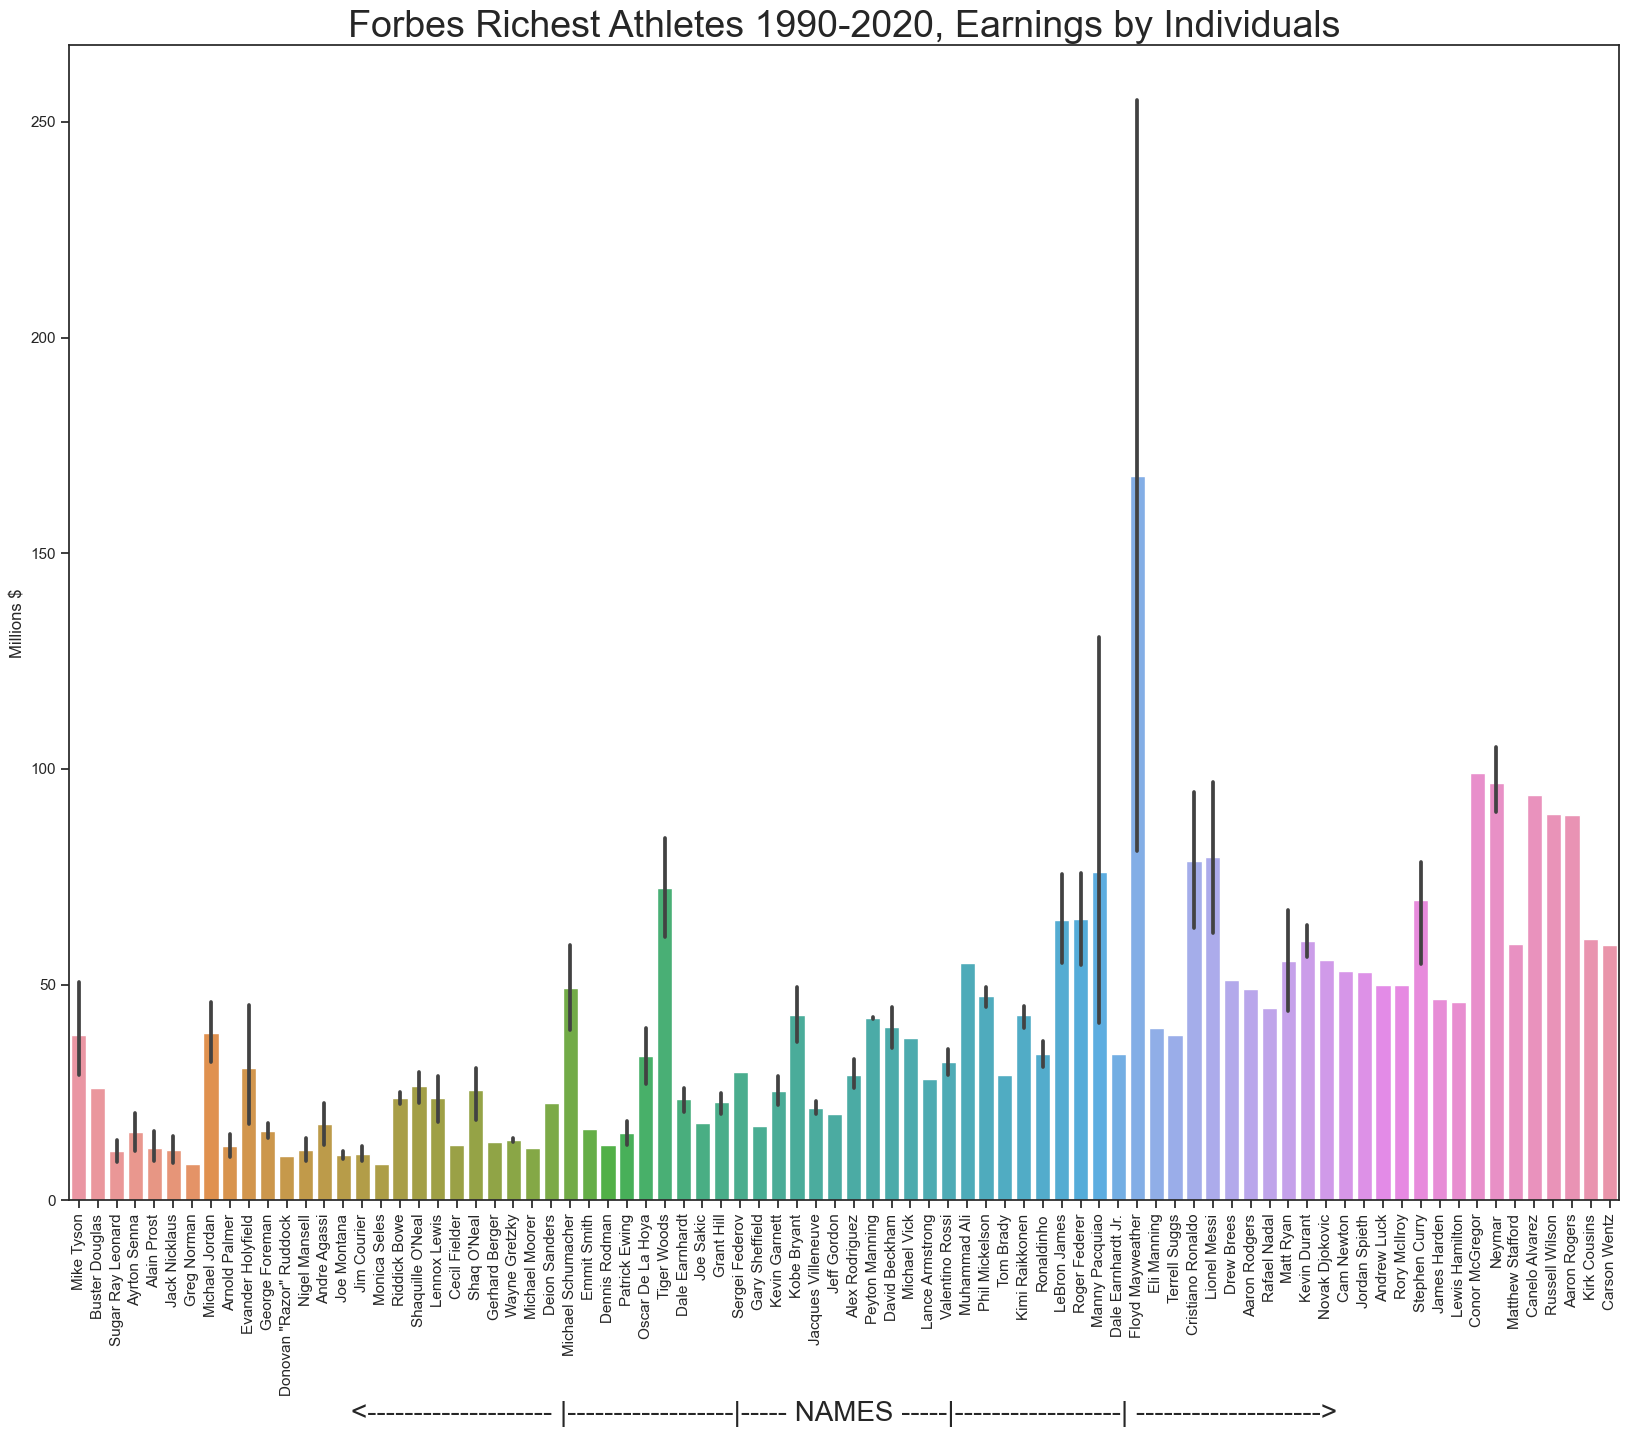

In [70]:
# CLEAR EXPLAINATION OF HOW TO FORMULATE A SEABORN histplot()
#https://machinelearningknowledge.ai/seaborn-histogram-plot-using-histplot-tutorial-for-beginners/
sns.barplot(data=dfv2, x=dfv2.Name, y=dfv2['earnings ($ million)']) #hue='earnings ($ million)' , hue='Name'
sns.set(rc={"figure.figsize":(20, 15)}) #width=20, height=10
plt.ylabel('Millions $')
#plt.legend(dfv2.Name, loc="lower left", ncol=len(dfv2.columns), bbox_to_anchor=(0.4, 0.7)) #bbox_to_anchor=(0.9, 1),
#plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xlabel('<-------------------- |------------------|----- NAMES -----|------------------| -------------------->', fontsize=20)
plt.xticks(rotation=90) 
plt.title('Forbes Richest Athletes 1990-2020, Earnings by Individuals', fontsize=27)

## A GRAPH OF EARNINGS BY SPORT - histplot()

Text(0.5, 1.0, 'Forbes Richest Athletes 1990-2020, Earnings by Sport')

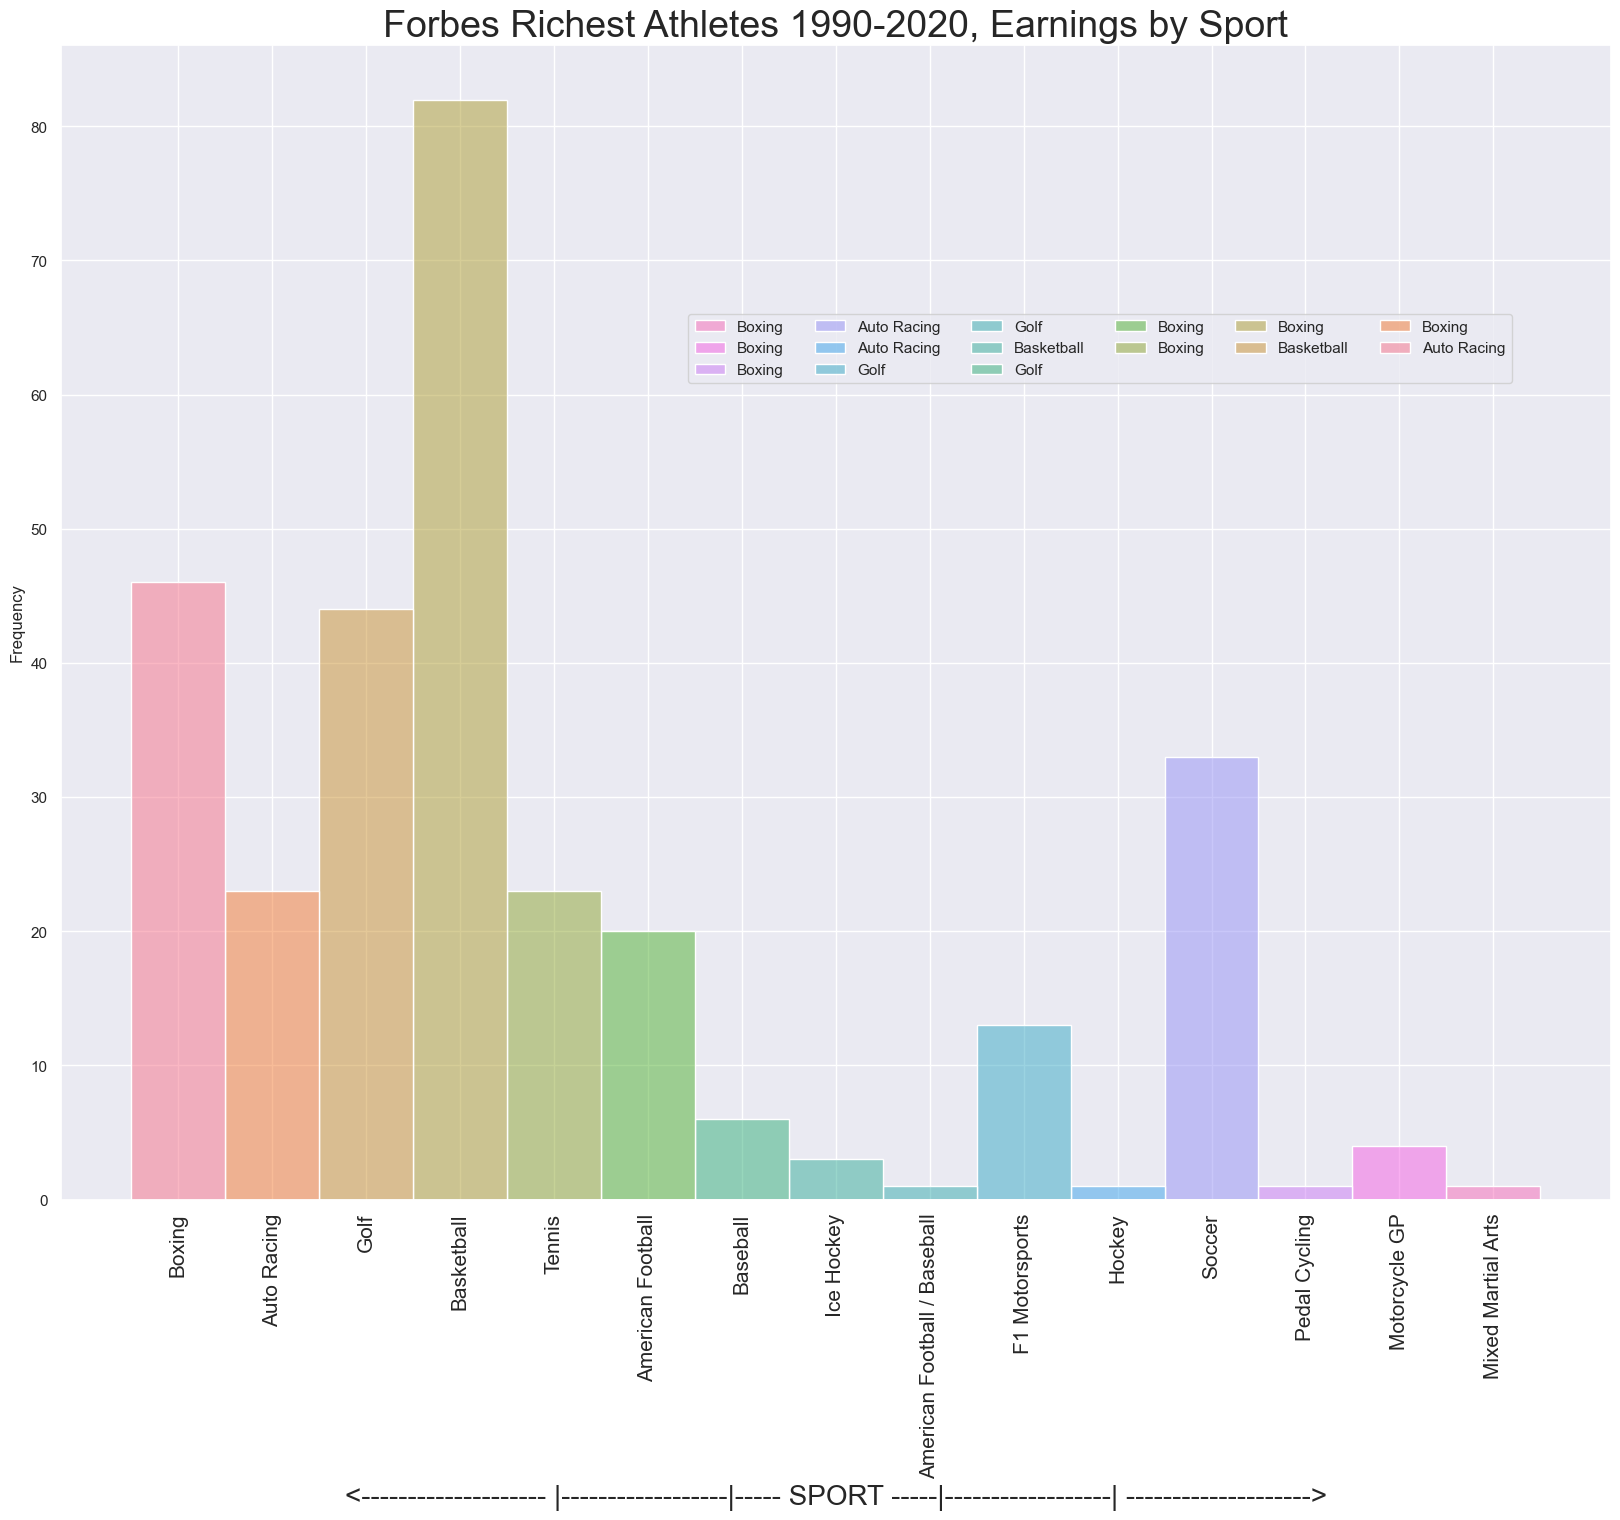

In [60]:
# CLEAR EXPLAINATION OF HOW TO FORMULATE A SEABORN histplot()
#https://machinelearningknowledge.ai/seaborn-histogram-plot-using-histplot-tutorial-for-beginners/
sns.histplot(data=dfv2, x='Sport', hue='Sport', legend=True, kde=True) #hue='earnings ($ million)' , hue='Name'
sns.set(rc={"figure.figsize":(20, 15)}) #width=20, height=10
plt.ylabel('Frequency')
# https://stackoverflow.com/questions/54870585/matplotlib-how-to-show-legend-elements-horizontally
plt.legend(dfv2.Sport, loc="lower left", ncol=len(dfv2.columns), bbox_to_anchor=(0.4, 0.7)) #bbox_to_anchor=(0.9, 1),
#plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xlabel('<-------------------- |------------------|----- SPORT -----|------------------| -------------------->', fontsize=20)
plt.xticks(rotation=90, fontsize=15) 
plt.title('Forbes Richest Athletes 1990-2020, Earnings by Sport', fontsize=27)

In [22]:
earning_count = dfv2['earnings ($ million)'].value_counts()
print(earning_count)

40.0    7
35.0    7
23.0    6
28.0    6
33.0    5
       ..
24.5    1
21.0    1
78.0    1
30.5    1
59.1    1
Name: earnings ($ million), Length: 198, dtype: int64


In [23]:
name_count = dfv2.Name.groupby(dfv2['earnings ($ million)'])
print(name_count)

## A GRAPH OF EARNINGS BY INDIVIDUAL - scatterplot()

Text(0.5, 1.0, 'Forbes Richest Athletes 1990-2020, Earnings by Individual')

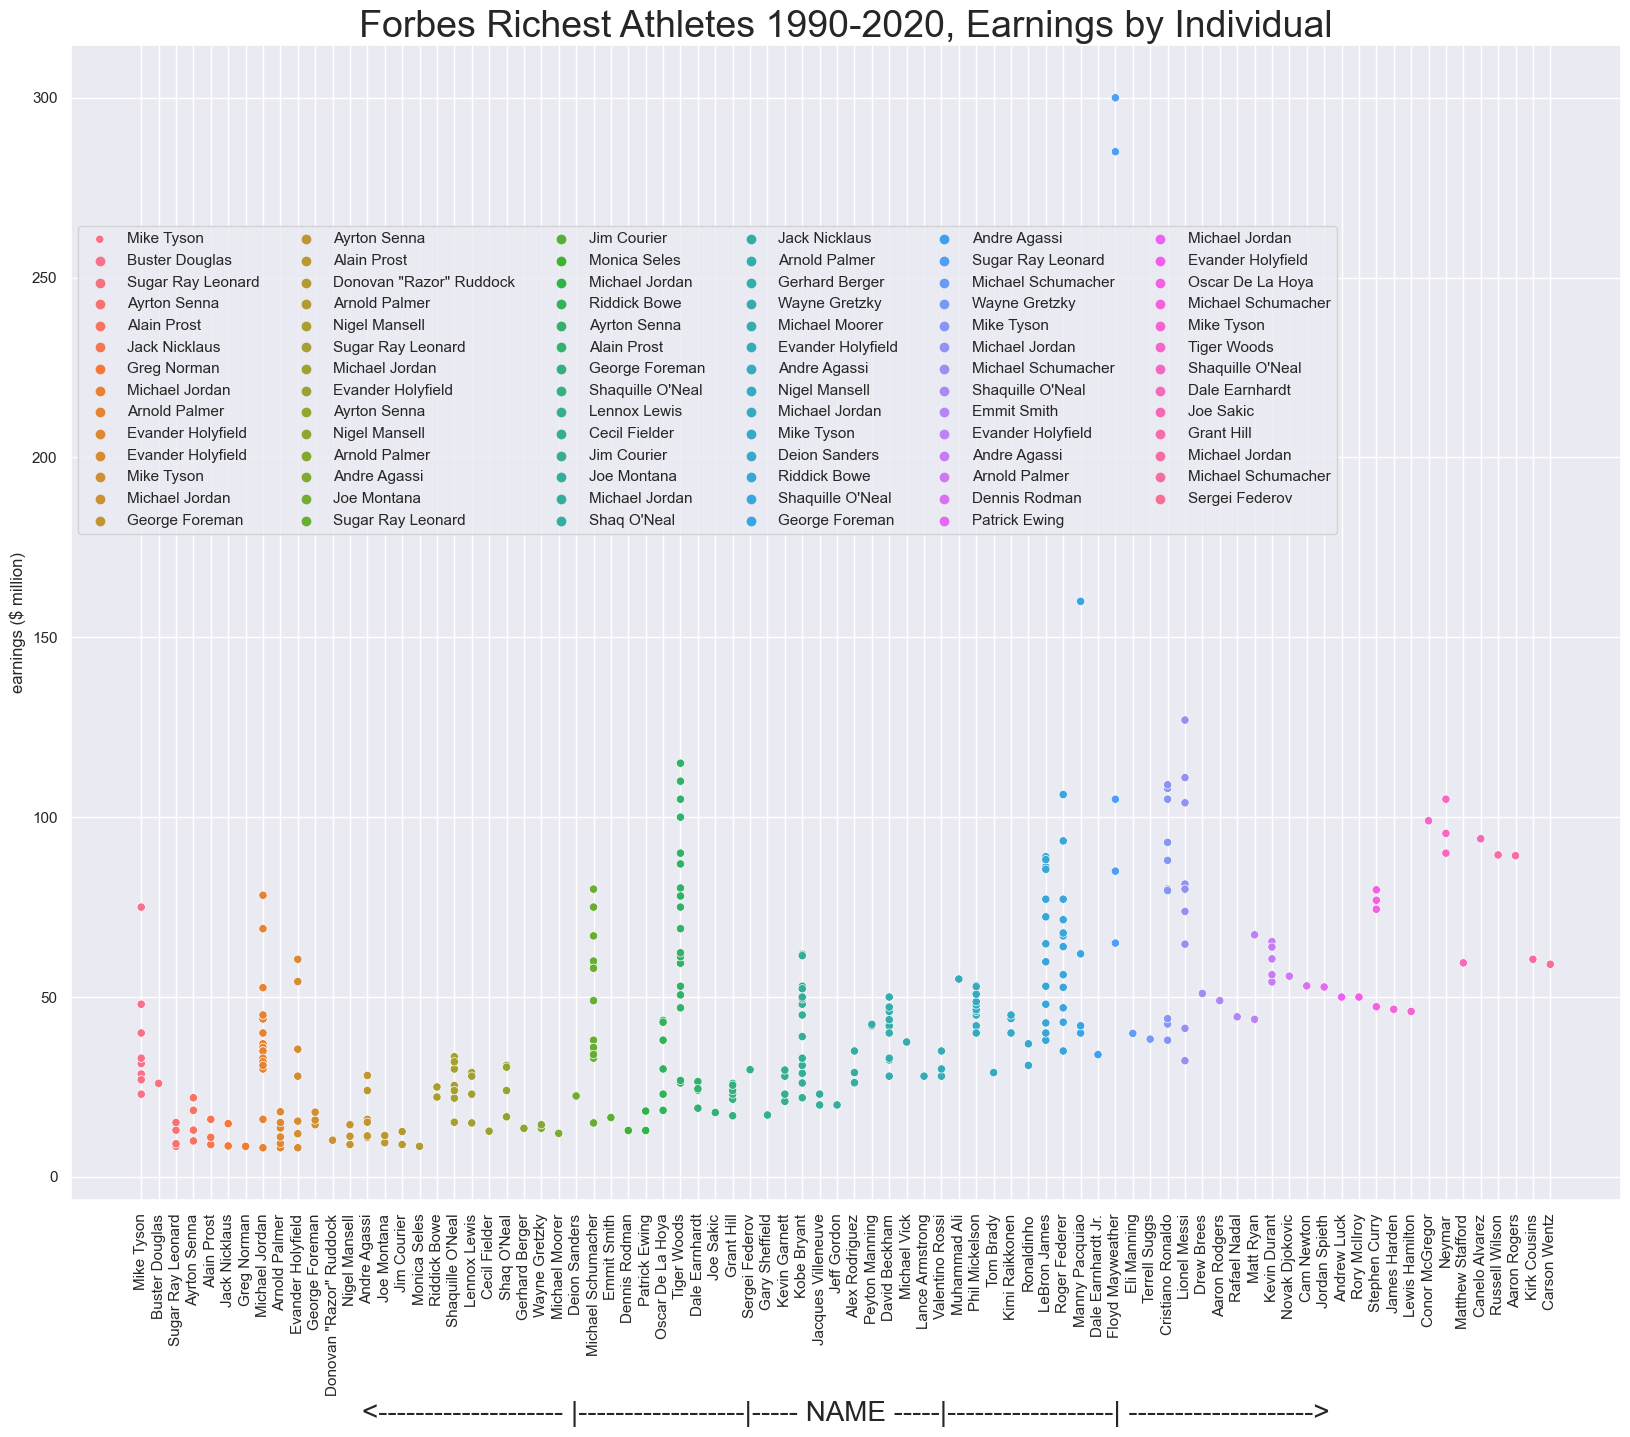

In [61]:
sns.scatterplot(data=dfv2, x=dfv2.Name, y=dfv2['earnings ($ million)'], hue=dfv2.Name, legend=True)
plt.legend(dfv2.Name, loc="upper left", ncol=len(dfv2.columns), bbox_to_anchor=(0, 0.85)) #bbox_to_anchor=(0.9, 1),
plt.xticks(rotation=90)
plt.xlabel('<-------------------- |------------------|----- NAME -----|------------------| -------------------->', fontsize=20)
# plt.xticks(rotation=90, fontsize=15) 
plt.title('Forbes Richest Athletes 1990-2020, Earnings by Individual', fontsize=27)

## A GRAPH OF EARNINGS BY TIME - boxplot()

Text(0.5, 1.0, 'Forbes Richest Athletes 1990-2020, Earnings by Time')

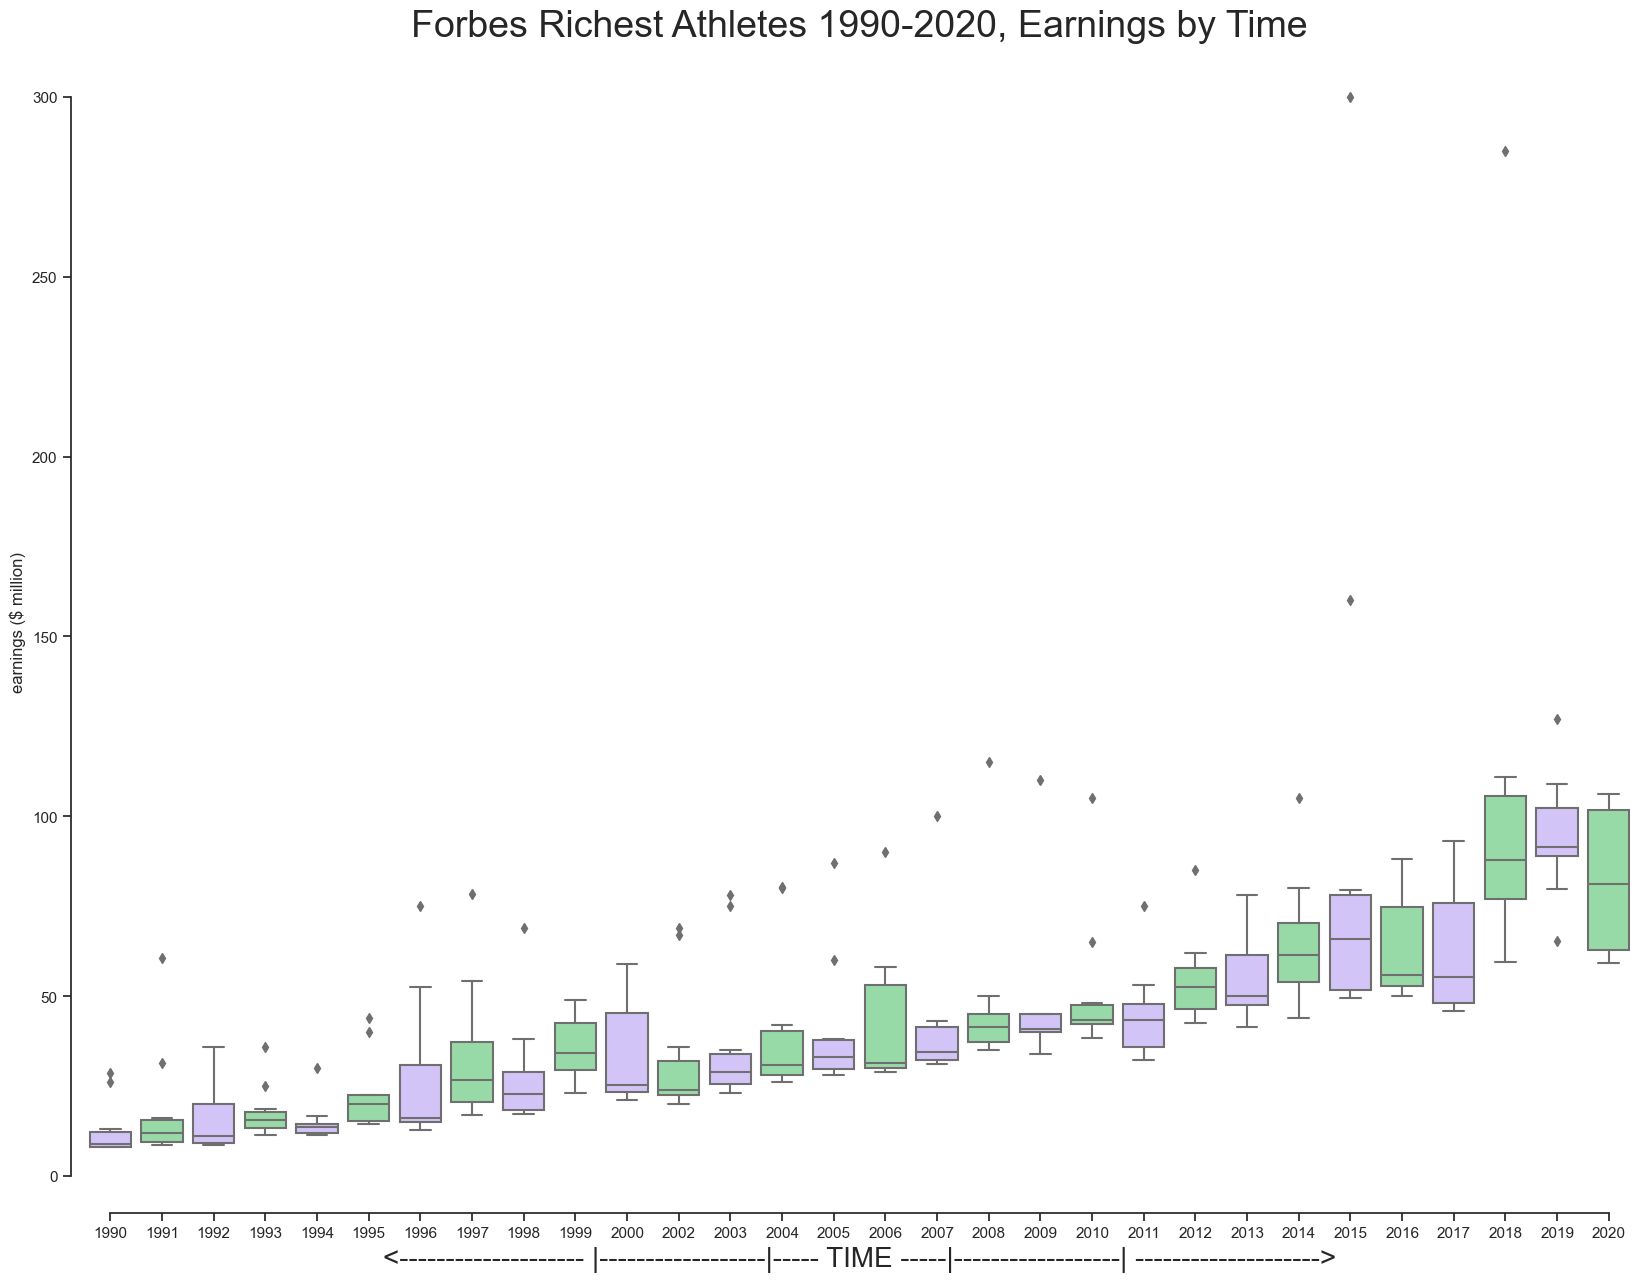

In [62]:
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x=dfv2.Year, y=dfv2['earnings ($ million)'], palette=["m", "g"], data=dfv2.Year)  #hue=dfv2['earnings ($ million)'],
sns.despine(offset=10, trim=True)
plt.xlabel('<-------------------- |------------------|----- TIME -----|------------------| -------------------->', fontsize=20)
# plt.xticks(rotation=90, fontsize=15) 
plt.title('Forbes Richest Athletes 1990-2020, Earnings by Time', fontsize=27)

## CREATING A DICITONARY OF NAME FREQUENCY IN THE DATASET

In [26]:
word_name = dfv2.Name.value_counts()
name_dict = word_name.to_dict()

## A GRAPH OF NAME FREQUENCY - Word Cloud 

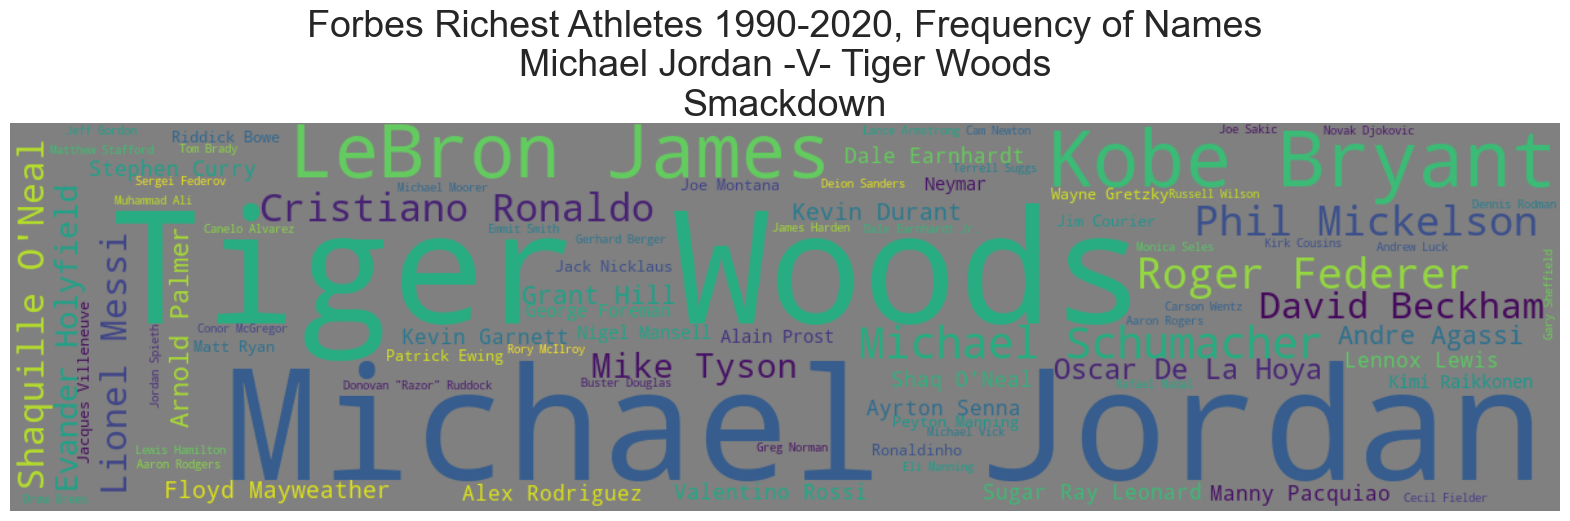

In [64]:
# https://stackoverflow.com/questions/43145199/create-wordcloud-from-dictionary-values

# WordCloud expects a dictionary, generate_from_frequencies() <-- passed in variety_dict
wc = WordCloud(background_color="grey",width=1200,height=300,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(name_dict)
plt.imshow(wc, interpolation ="bilinear")
plt.axis("off")
plt.margins(x =0, y =0)
#plt.title("A Word Cloud of Wine Varieties, ooh-la-la", fontsize = 30)
 
plt.title('''Forbes Richest Athletes 1990-2020, Frequency of Names
Michael Jordan -V- Tiger Woods
Smackdown''', fontsize=27)
plt.show()

## CREATING A COUNT OF THE NATIONALITY FREQUENCY IN THE DATASET

In [28]:
country_name = dfv2.Nationality.value_counts()
print(country_name)
#country_name.info()

USA                 206
UK                   13
Germany              13
Switzerland          12
Portugal             10
Brazil                9
Argentina             9
Canada                6
Italy                 4
Finland               3
France                3
Philippines           3
Russia                1
Australia             1
Dominican             1
Austria               1
Filipino              1
Spain                 1
Serbia                1
Northern Ireland      1
Ireland               1
Mexico                1
Name: Nationality, dtype: int64


## GRAPH OF INDIVIDUALS IN THE LIST BY NATIONALITY - pie() CHART

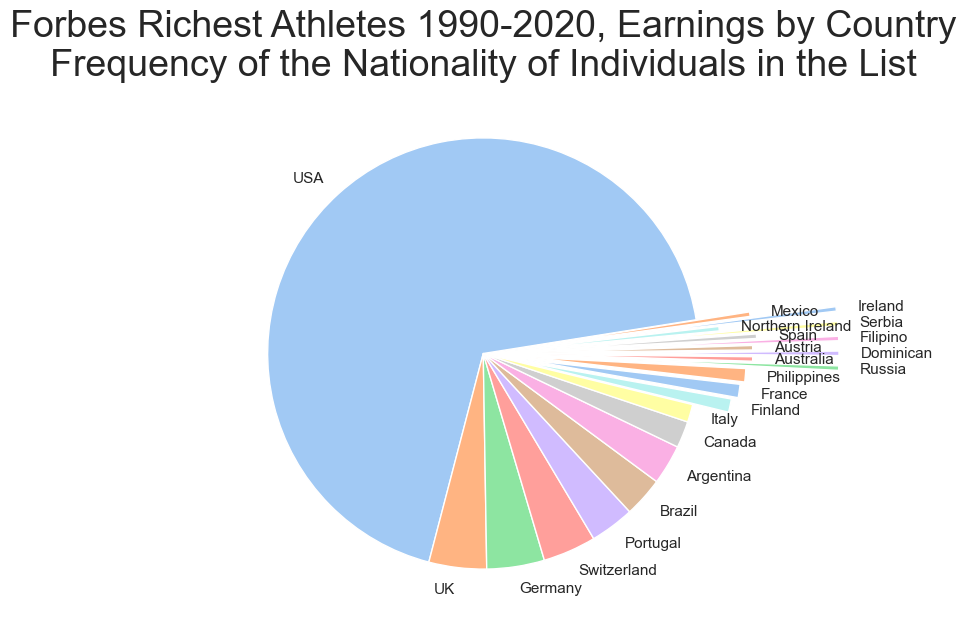

In [66]:
explodes = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.17, 0.20, 0.22, 0.65, 0.25, 0.65, 0.25, 0.65, 0.27, 0.65, 0.1, 0.65, 0.25]
names = ['USA','UK','Germany','Switzerland','Portugal','Brazil','Argentina','Canada','Italy','Finland','France','Philippines','Russia','Australia','Dominican','Austria','Filipino','Spain','Serbia','Northern Ireland','Ireland','Mexico']
fig = plt.figure(figsize =(10, 7))
plt.pie(country_name, labels=names, startangle=9, explode=explodes) # autopct='%1.1f%%',
# plt.legend(names, loc='center right')
#plt.subplots_adjust(left=0.0, bottom=1, right=1)
plt.title('''Forbes Richest Athletes 1990-2020, Earnings by Country
Frequency of the Nationality of Individuals in the List''', fontsize=27)
plt.show()

## CREATING A NEW DATASET WITH PREVIOUS YEAR RANK & CURRENT RANK

In [30]:
dfv3 = pd.read_csv('Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv', delimiter=',', na_values='')
dfv3.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


## CHECKING WHICH COLUMNS THERE ARE

In [31]:
# FIND A LIST OF COLUMN HEADINGS FOR dfv3
list(dfv3)

['S.NO',
 'Name',
 'Nationality',
 'Current Rank',
 'Previous Year Rank',
 'Sport',
 'Year',
 'earnings ($ million)']

## DROP COLUMNS NOT NEEDED

In [33]:
dfv3.drop(['Nationality','Sport'], axis=1, inplace=True)

## CHECK COLUMNS HAVE BEEN DROPPED

In [34]:
list(dfv3)

['S.NO',
 'Name',
 'Current Rank',
 'Previous Year Rank',
 'Year',
 'earnings ($ million)']

## IT SEEMS SURPRISING THAT FLOYD MAYWEATHER STANDS OUT IN THE GRAPHS AS THE WEALTHIEST PERSON.

## CHECKING AGAIN FOR SOME ANOMALY IN A LIST OF NAMES TO EXPLAIN WHY FLOYD MAYWEATHER STANDS OUT IN THE GRAPHS AS THE WEALTHIEST PERSON.

In [48]:
dfv3.Name.unique()

array(['Mike Tyson', 'Buster Douglas', 'Sugar Ray Leonard',
       'Ayrton Senna', 'Alain Prost', 'Jack Nicklaus', 'Greg Norman',
       'Michael Jordan', 'Arnold Palmer', 'Evander Holyfield',
       'George Foreman', 'Donovan "Razor" Ruddock', 'Nigel Mansell',
       'Andre Agassi', 'Joe Montana', 'Jim Courier', 'Monica Seles',
       'Riddick Bowe', "Shaquille O'Neal", 'Lennox Lewis',
       'Cecil Fielder', "Shaq O'Neal", 'Gerhard Berger', 'Wayne Gretzky',
       'Michael Moorer', 'Deion Sanders', 'Michael Schumacher',
       'Emmit Smith', 'Dennis Rodman', 'Patrick Ewing',
       'Oscar De La Hoya', 'Tiger Woods', 'Dale Earnhardt', 'Joe Sakic',
       'Grant Hill', 'Sergei Federov', 'Gary Sheffield', 'Kevin Garnett',
       'Kobe Bryant', 'Jacques Villeneuve', 'Jeff Gordon',
       'Alex Rodriguez', 'Peyton Manning', 'David Beckham',
       'Michael Vick', 'Lance Armstrong', 'Valentino Rossi',
       'Muhammad Ali', 'Phil Mickelson', 'Tom Brady', 'Kimi Raikkonen',
       'Ronaldinh

## USING THE NEW DATASET TO CHECK IF FLOYD MAYWEATHER IS THE WEALTHIEST PERSON.

## GRAPH OF PERSONS WEALTH IN THE DATASET OVER TIME (AGGREGATED) -boxplot()

Text(0.5, 1.0, 'Forbes Richest Athletes 1990-2020,\nEarnings by Individuals Aggregated Over the Period of Time')

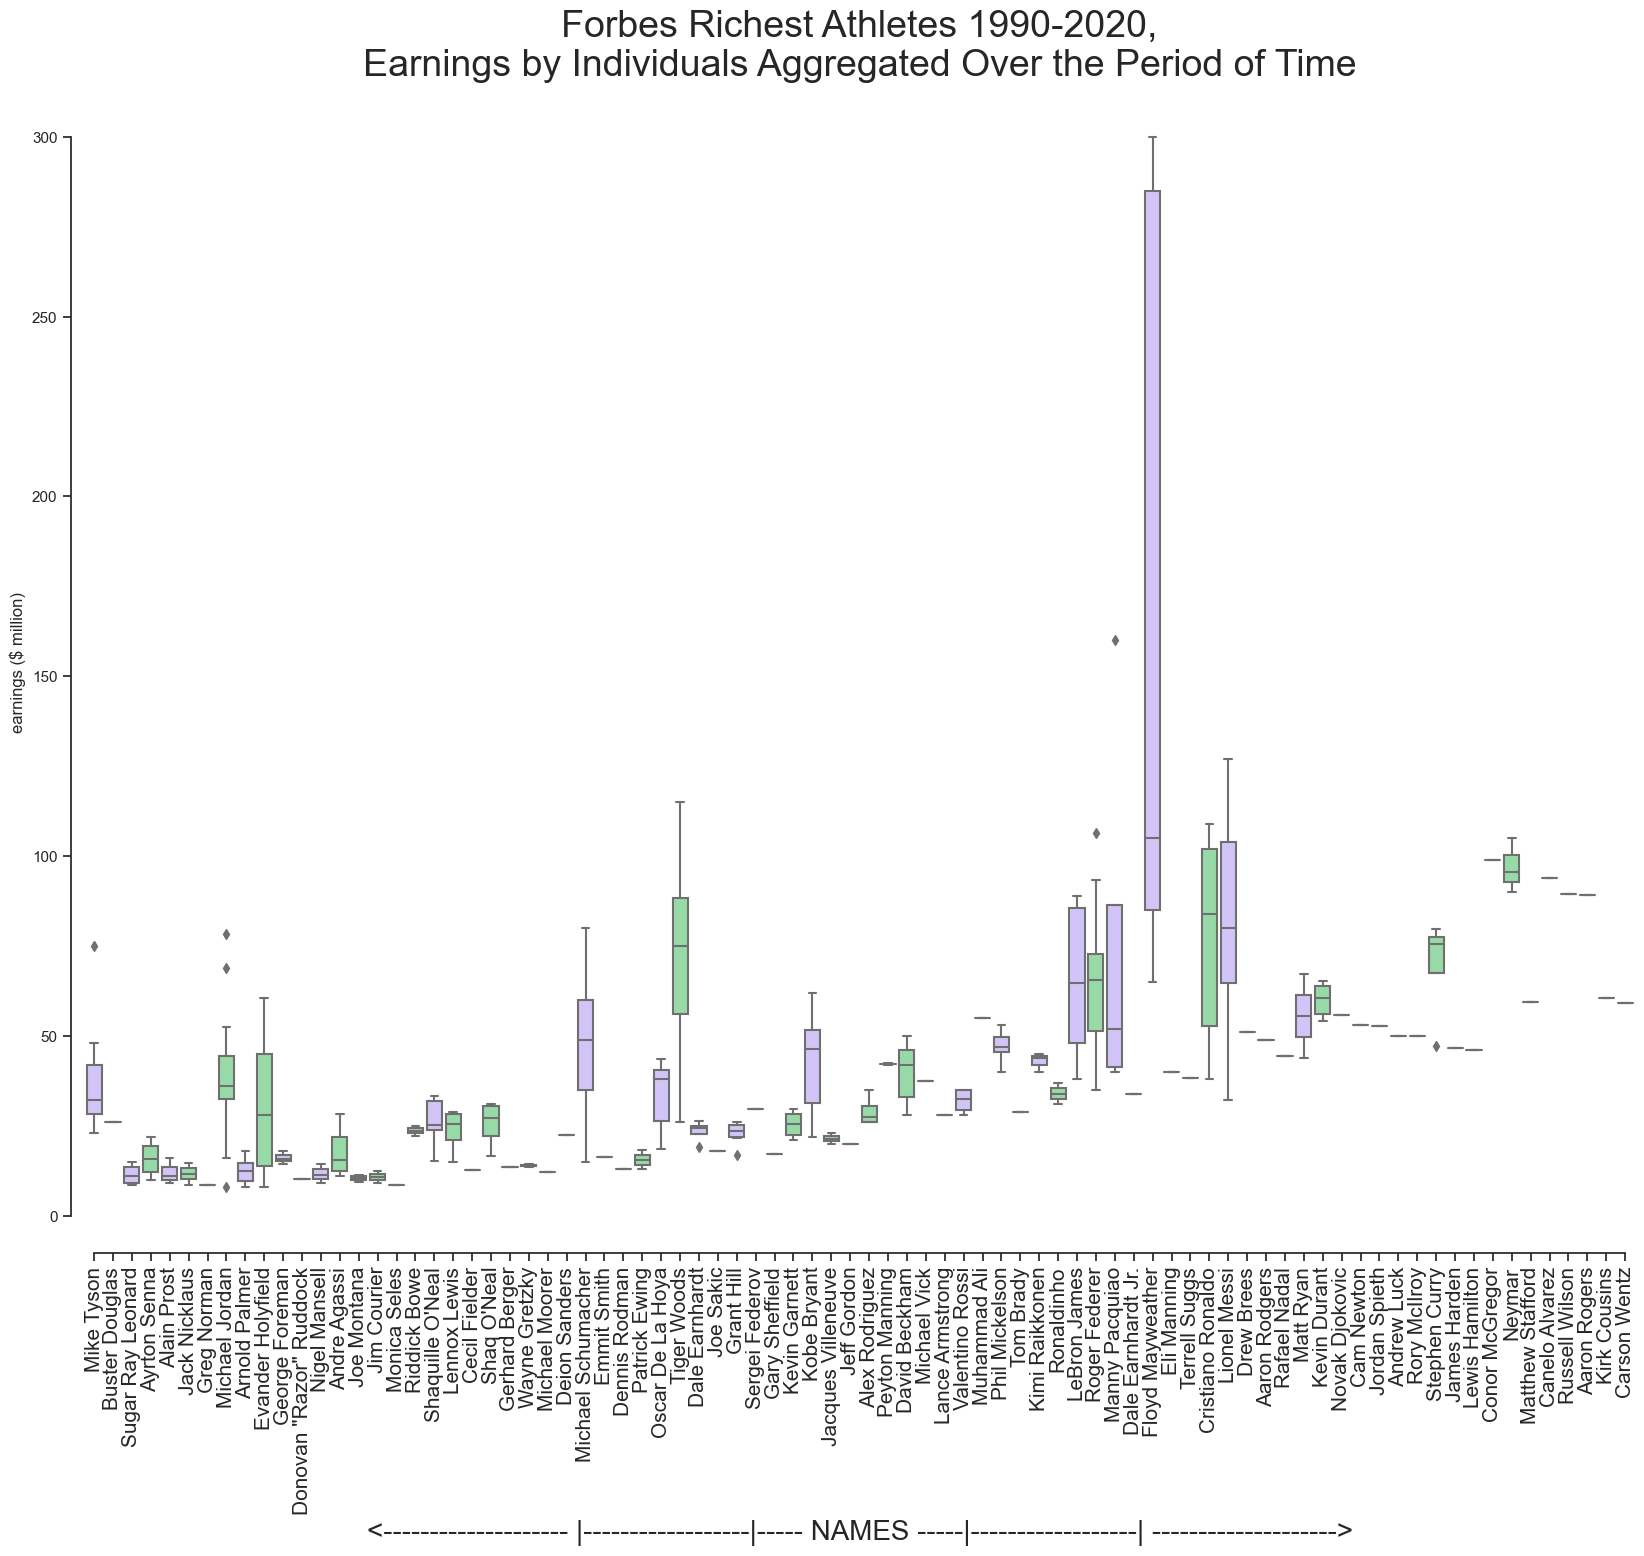

In [69]:
sns.set_theme(style="ticks", palette="pastel")
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x=dfv3.Name, y=dfv3['earnings ($ million)'], palette=["m", "g"], data=dfv2.Year)  #hue=dfv2['earnings ($ million)'],
sns.despine(offset=10, trim=True)
# plt.xticks(rotation=90)
plt.xlabel('<-------------------- |------------------|----- NAMES -----|------------------| -------------------->', fontsize=20)
plt.xticks(rotation=90, fontsize=15) 
plt.title('''Forbes Richest Athletes 1990-2020,
Earnings by Individuals Aggregated Over the Period of Time''', fontsize=27)


https://wealthygorilla.com/floyd-mayweather-net-worth/

## THIS WEBSITE INDICATES THAT THE FLOYD MAYWEATHER DATA IS ACCURATE TO DESCRIBE HIM AS THE WEALTHIEST PERSON IN THE DATASET.